# Aarti Sharma 
GRIP Internship (Data Science and Business Analytics) at The Spark Foundation

# Task 3 - Exploratory Data Analysis

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as pt
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# Loading dataset

In [2]:
a=pd.read_csv('SampleSuperstore.csv')
a.head()
warnings.filterwarnings('ignore') ### To avoid the warnings generate during the plotting

In [3]:
a.shape ## To know about the rows and columns of dataset

(9994, 13)

In [4]:
pd.DataFrame(a)  
###this is quite similar to original dataset as it is already in form of dataframe this step can be omitted 

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [5]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
### to calculate basic statistics of dataset
a.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
a.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Visualization

<Figure size 720x1152 with 0 Axes>

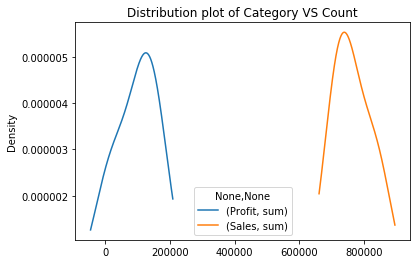

In [8]:
plt.figure(figsize= (10,16)) ### TO Set the size of the plot
a.groupby('Category')['Profit','Sales'].agg(['sum']).plot.kde()
plt.title('Distribution plot of Category VS Count')
plt.show()

<Figure size 1080x720 with 0 Axes>

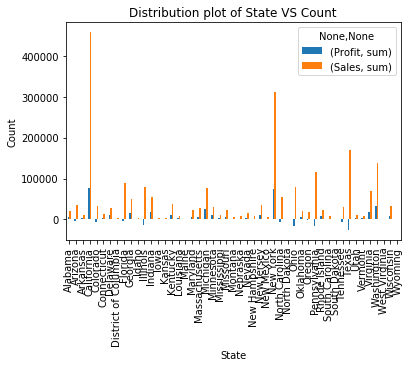

In [9]:
plt.figure(figsize= (15,10)) ### TO Set the size of the plot
a.groupby('State')['Profit','Sales'].agg(['sum']).plot.bar()
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution plot of State VS Count')
plt.show()

<Figure size 1080x720 with 0 Axes>

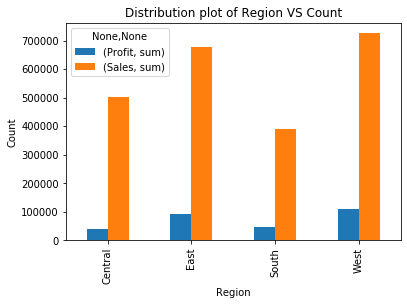

In [10]:
plt.figure(figsize= (15,10)) ### TO Set the size of the plot
a.groupby('Region')['Profit','Sales'].agg(['sum']).plot.bar()
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution plot of Region VS Count')
plt.show()

In [11]:
#### to measure correlation
b=a.corr()
b

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


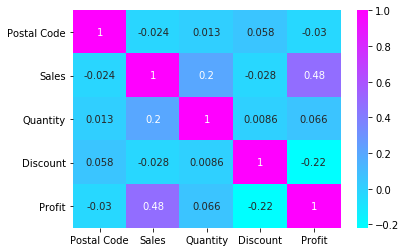

In [12]:
##### Correlation heatmap#####
sns.heatmap(b,cmap='cool',annot=True)

# Plotting

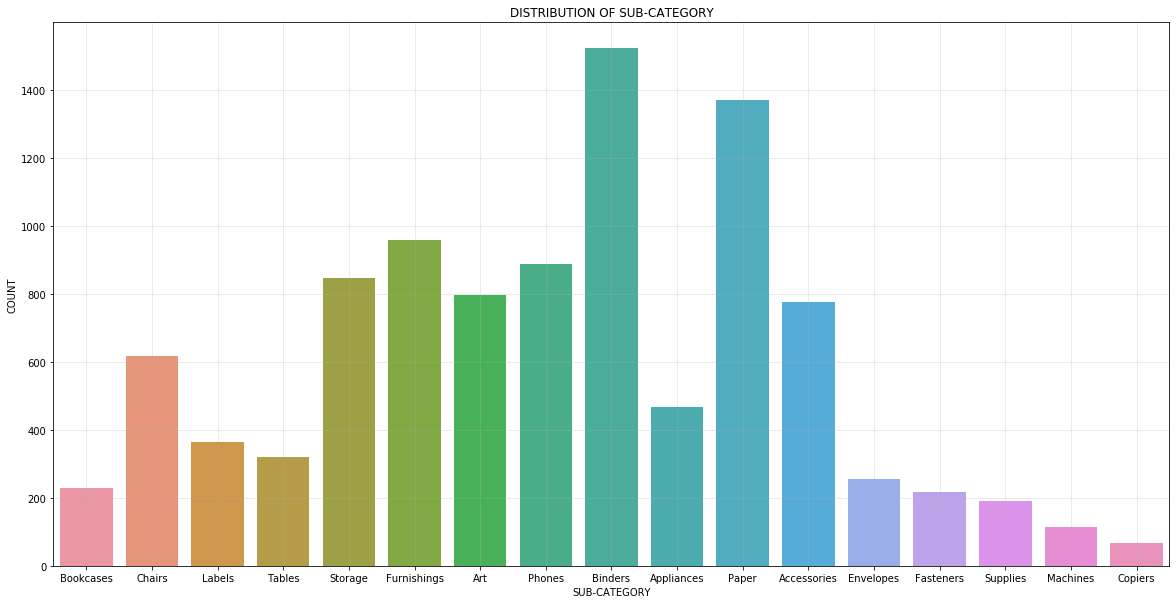

In [13]:
## Distribution plot of sub-category
plt.figure(figsize=(20,10))
sns.countplot('Sub-Category',data=a);
plt.title('DISTRIBUTION OF SUB-CATEGORY')
plt.xlabel('SUB-CATEGORY')
plt.ylabel('COUNT')
plt.grid(alpha=0.3)
plt.show()

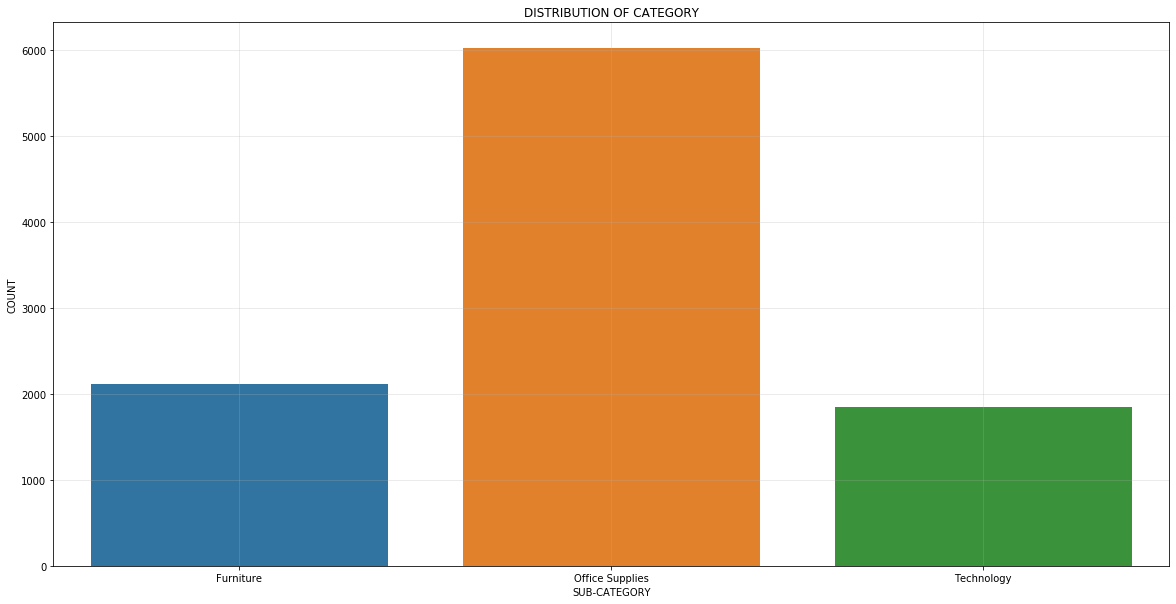

In [14]:
## Distribution plot of category
plt.figure(figsize=(20,10))
sns.countplot('Category',data=a);
plt.title('DISTRIBUTION OF CATEGORY')
plt.xlabel('SUB-CATEGORY')
plt.ylabel('COUNT')
plt.grid(alpha=0.3)
plt.show()

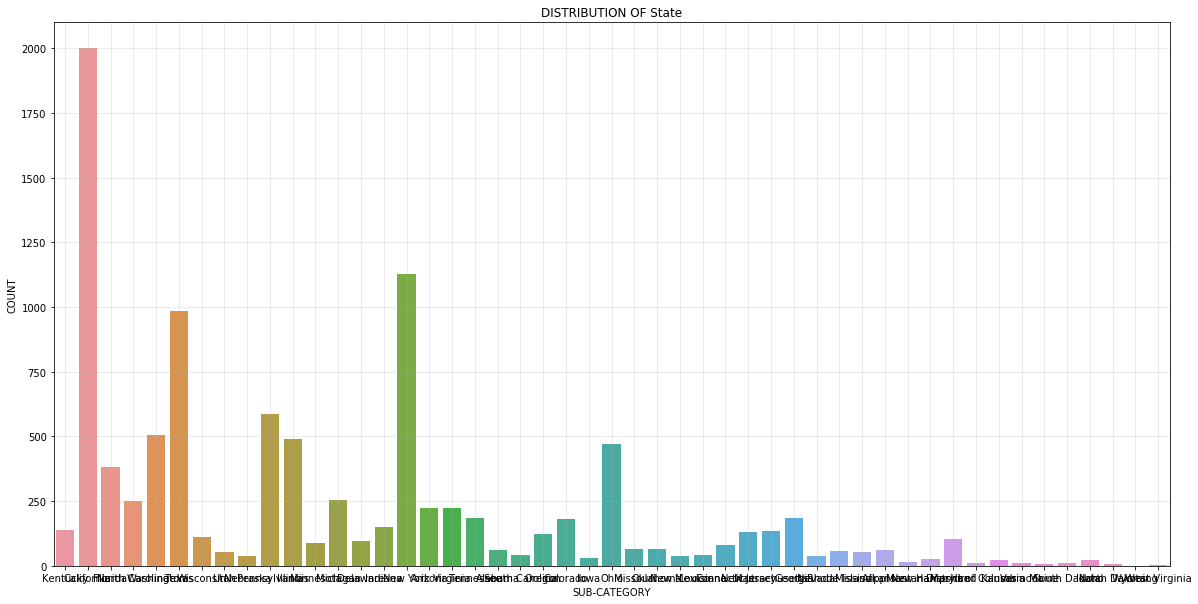

In [15]:
## Distribution plot of sub-category
plt.figure(figsize=(20,10))
sns.countplot('State',data=a);
plt.title('DISTRIBUTION OF State')
plt.xlabel('SUB-CATEGORY')
plt.ylabel('COUNT')
plt.grid(alpha=0.3)
plt.show()

# Subplotting

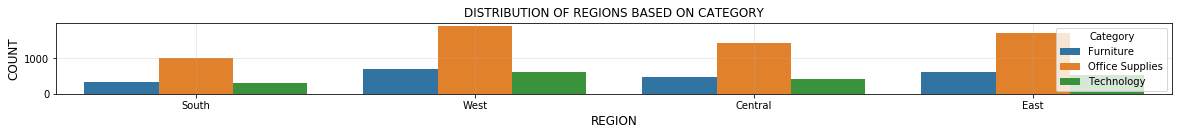

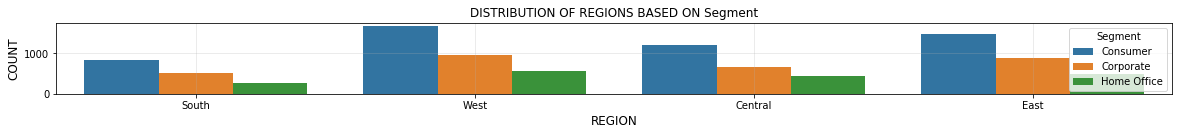

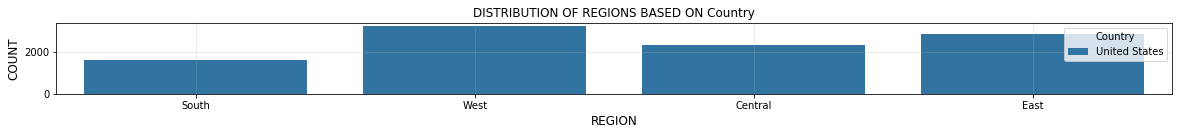

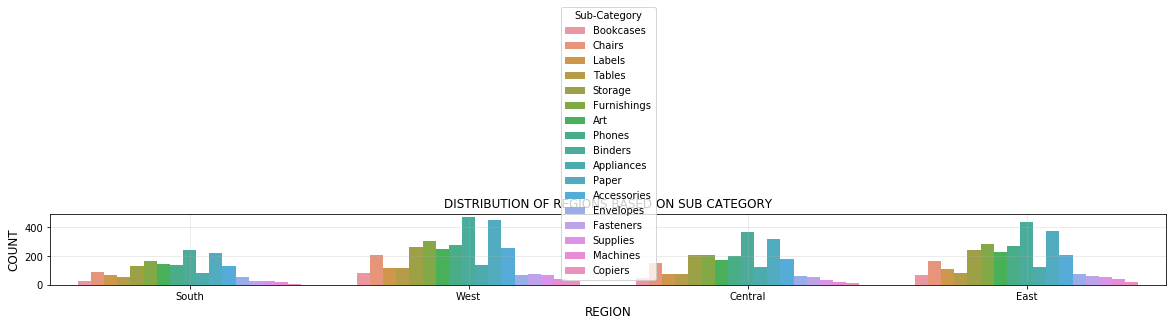

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(4,1,1)
sns.countplot('Region',hue='Category',data=a)
plt.title('DISTRIBUTION OF REGIONS BASED ON CATEGORY')
plt.ylabel('COUNT',fontsize=12)
plt.xlabel('REGION',fontsize=12)
plt.grid(alpha=0.3)
plt.show()


plt.figure(figsize=(20,6))
plt.subplot(4,1,2)
sns.countplot('Region',hue='Segment',data=a)
plt.title('DISTRIBUTION OF REGIONS BASED ON Segment')
plt.ylabel('COUNT',fontsize=12)
plt.xlabel('REGION',fontsize=12)
plt.grid(alpha=0.3)
plt.show()


plt.figure(figsize=(20,6))
plt.subplot(4,1,3)
sns.countplot('Region',hue='Country',data=a)
plt.title('DISTRIBUTION OF REGIONS BASED ON Country')
plt.ylabel('COUNT',fontsize=12)
plt.xlabel('REGION',fontsize=12)
plt.grid(alpha=0.3)
plt.show()


plt.figure(figsize=(20,6))
plt.subplot(4,1,4)
sns.countplot('Region',hue='Sub-Category',data=a)
plt.title('DISTRIBUTION OF REGIONS BASED ON SUB CATEGORY')
plt.ylabel('COUNT',fontsize=12)
plt.xlabel('REGION',fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Thank you